In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 10)  # Set the maximum number of rows to display to 100

In [3]:
df = pd.read_csv('MusicData.csv')
df.drop('index', inplace=True, axis=1) 
df

,Format,Metric,Year,Number of Records,Value (Actual)
0,CD,Units,1973,1,NaN
1,CD,Units,1974,1,NaN
2,CD,Units,1975,1,NaN
3,CD,Units,1976,1,NaN
4,CD,Units,1977,1,NaN
...,...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,1,6.205390
3004,Vinyl Single,Value (Adjusted),2016,1,5.198931
3005,Vinyl Single,Value (Adjusted),2017,1,6.339678
3006,Vinyl Single,Value (Adjusted),2018,1,5.386197


<Axes: >

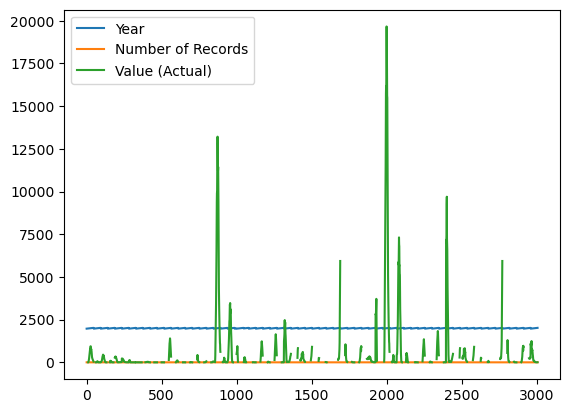

In [4]:
df.plot()

In [5]:
#checking to see if there are any null values
df.isna().sum()

Format                  0
Metric                  0
Year                    0
Number of Records       0
Value (Actual)       1657
dtype: int64

In [6]:
#dropping useless column that has a value of 1 for every single row
df = pd.read_csv('MusicData.csv',index_col='index').drop(columns=['Number of Records'])
df

,Format,Metric,Year,Value (Actual)
index,,,,
0,CD,Units,1973,NaN
1,CD,Units,1974,NaN
2,CD,Units,1975,NaN
3,CD,Units,1976,NaN
4,CD,Units,1977,NaN
...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,6.205390
3004,Vinyl Single,Value (Adjusted),2016,5.198931
3005,Vinyl Single,Value (Adjusted),2017,6.339678


In [7]:
#dropping nan values because they don't contribute
df.dropna(subset=['Value (Actual)'], inplace=True)
df

,Format,Metric,Year,Value (Actual)
index,,,,
10,CD,Units,1983,0.800000
11,CD,Units,1984,5.800000
12,CD,Units,1985,22.600000
13,CD,Units,1986,53.000000
14,CD,Units,1987,102.100000
...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,6.205390
3004,Vinyl Single,Value (Adjusted),2016,5.198931
3005,Vinyl Single,Value (Adjusted),2017,6.339678


In [8]:
#Renaming the last column because it was hard to read and understand
df['Value (Actual)'] = df['Value (Actual)'].round(2)
df = df.rename(columns={'Value (Actual)': 'Actual Value (in millions)'})
df

,Format,Metric,Year,Actual Value (in millions)
index,,,,
10,CD,Units,1983,0.80
11,CD,Units,1984,5.80
12,CD,Units,1985,22.60
13,CD,Units,1986,53.00
14,CD,Units,1987,102.10
...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,6.21
3004,Vinyl Single,Value (Adjusted),2016,5.20
3005,Vinyl Single,Value (Adjusted),2017,6.34


In [9]:
#Check to see what the 3 units of measurement are and the different music formats
print(df.Metric.unique())
print(df.Format.unique())

['Units' 'Value' 'Value (Adjusted)']
['CD' 'CD Single' 'Cassette' 'Cassette Single' 'LP/EP' 'Vinyl Single'
 '8 - Track' 'Other Tapes' 'Music Video (Physical)' 'DVD Audio' 'SACD'
 'Download Single' 'Download Album' 'Kiosk' 'Download Music Video'
 'Ringtones & Ringbacks' 'Paid Subscriptions'
 'Limited Tier Paid Subscription' 'On-Demand Streaming (Ad-Supported)'
 'Other Ad-Supported Streaming' 'Other Digital' 'Paid Subscription'
 'SoundExchange Distributions' 'Synchronization']


In [10]:
#df = df[df['Format'].str.contains('Kiosk|Ringtones & Ringbacks|Synchronization|SoundExchange Distributions') == False]
#df = df.reset_index(drop=True)
df

,Format,Metric,Year,Actual Value (in millions)
index,,,,
10,CD,Units,1983,0.80
11,CD,Units,1984,5.80
12,CD,Units,1985,22.60
13,CD,Units,1986,53.00
14,CD,Units,1987,102.10
...,...,...,...,...
3003,Vinyl Single,Value (Adjusted),2015,6.21
3004,Vinyl Single,Value (Adjusted),2016,5.20
3005,Vinyl Single,Value (Adjusted),2017,6.34


In [11]:
#creating a dataframe of just the years
dfNoRepeatYears = df.sort_values(by='Year').drop_duplicates(subset=['Year'])
dfNoRepeatYears = dfNoRepeatYears.drop(columns=['Format', 'Metric', 'Actual Value (in millions)'])
dfNoRepeatYears.reset_index(drop=True, inplace=True)
dfNoRepeatYears

,Year
0,1973
1,1974
2,1975
3,1976
4,1977
...,...
42,2015
43,2016
44,2017
45,2018


In [12]:
#dfCD = df[df['Format'].str.contains('CD')]
#dfCD = dfCD.loc[df['Metric'] == 'Units']

dfCDSingle = df[df['Format']== 'CD Single']
dfCDSingleUnits = dfCDSingle.loc[df['Metric'] == 'Units']

dfCDUnits = df[df['Format']== 'CD']
dfCDUnits = dfCDUnits.loc[df['Metric'] == 'Units']

dfSACD = df[df['Format'] == 'SACD']
dfSACDUnits = dfSACD.loc[df['Metric']== 'Units']

dfCassette = df[df['Format']== 'Cassette']
dfCassetteUnits = dfCassette.loc[df['Metric'] == 'Units']

dfCassetteSingle = df[df['Format'] == 'Cassette Single']
dfCassetteSingleUnits = dfCassetteSingle.loc[df['Metric'] == 'Units']  # Add a closing square bracket after 'Metric'


In [13]:
from matplotlib import pyplot as plt

In [14]:
#getting general revenue of all formats over the years
chosen_metrics = df[df['Metric'] == 'Value']
salesByYear = chosen_metrics[['Year', 'Actual Value (in millions)']].set_index('Year').groupby('Year').sum().div(1000)
salesByYear = salesByYear.rename(columns={'Actual Value (in millions)': 'Actual Value (in billions)'})
salesByYear.index.name ='Year'
salesByYear

,Actual Value (in billions)
Year,
1973,2.01660
1974,2.19970
1975,2.38850
1976,2.73710
1977,3.50080
...,...
2015,6.71080
2016,7.57864
2017,8.79657


<Figure size 1000x600 with 0 Axes>

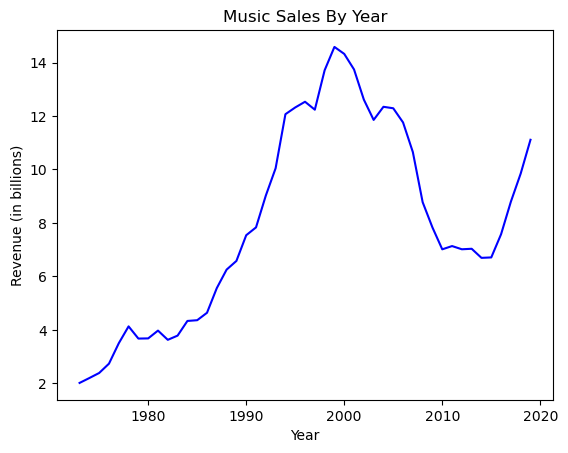

In [15]:
#plotting
plt.figure(figsize=(10,6))
salesByYear.plot(color= 'blue')
plt.title('Music Sales By Year')
plt.xlabel('Year')
plt.ylabel('Revenue (in billions)')
plt.legend('', frameon=False)

plt.show()

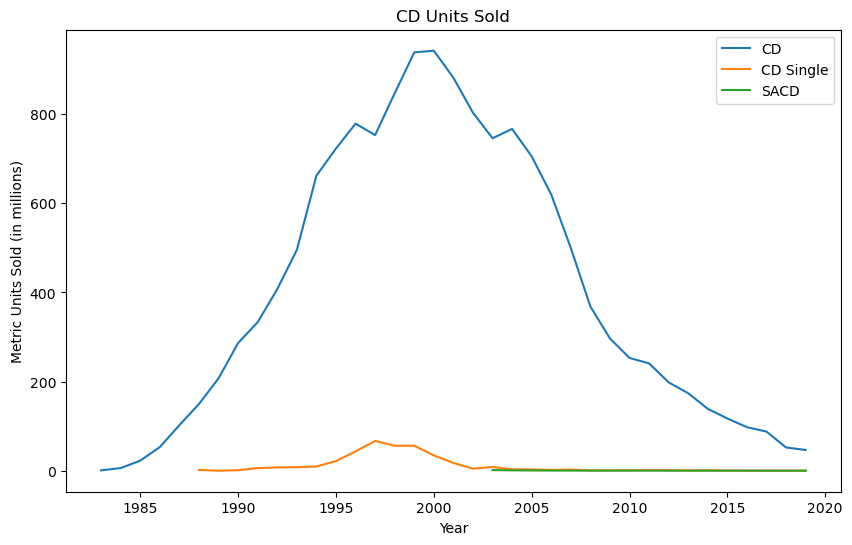

In [16]:
#plotting cd units sold
plt.figure(figsize=(10, 6))
plt.plot(dfCDUnits['Year'], dfCDUnits['Actual Value (in millions)'], linestyle='-',label = 'CD')
plt.plot(dfCDSingleUnits['Year'], dfCDSingleUnits['Actual Value (in millions)'], linestyle='-', label = 'CD Single')
plt.plot(dfSACDUnits['Year'], dfSACDUnits['Actual Value (in millions)'], linestyle='-', label = 'SACD')

plt.title('CD Units Sold')
plt.xlabel('Year')
plt.ylabel('Metric Units Sold (in millions)')
plt.legend(loc='upper right')

plt.show()

In [17]:

dfVinyl = df[df['Format']=='LP/EP']
dfVinylUnits = dfVinyl.loc[df['Metric'] == 'Units']

dfVinylSingle = df[df['Format']=='Vinyl Single']
dfVinylSingleUnits = dfVinylSingle.loc[df['Metric'] == 'Units']
dfVinylSingleUnits

,Format,Metric,Year,Actual Value (in millions)
index,,,,
235,Vinyl Single,Units,1973,228.00
236,Vinyl Single,Units,1974,204.00
237,Vinyl Single,Units,1975,164.00
238,Vinyl Single,Units,1976,190.00
239,Vinyl Single,Units,1977,190.00
...,...,...,...,...
277,Vinyl Single,Units,2015,0.51
278,Vinyl Single,Units,2016,0.40
279,Vinyl Single,Units,2017,0.40


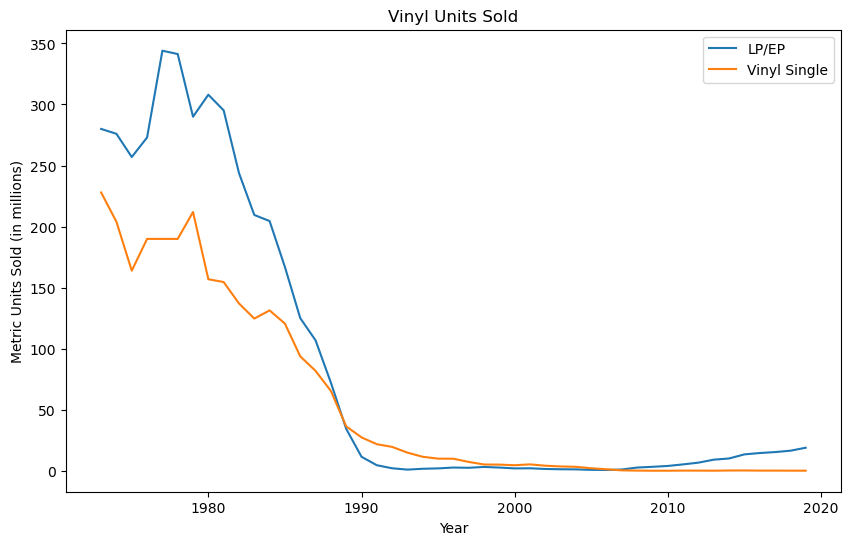

In [18]:
#plotting vinyl sales

plt.figure(figsize=(10, 6))


plt.plot(dfVinylUnits['Year'], dfVinylUnits['Actual Value (in millions)'], linestyle='-',label = 'LP/EP')
plt.plot(dfVinylSingleUnits['Year'], dfVinylSingleUnits['Actual Value (in millions)'], linestyle='-', label = 'Vinyl Single')

plt.title('Vinyl Units Sold')
plt.xlabel('Year')
plt.ylabel('Metric Units Sold (in millions)')
plt.legend(loc='upper right')

plt.show()

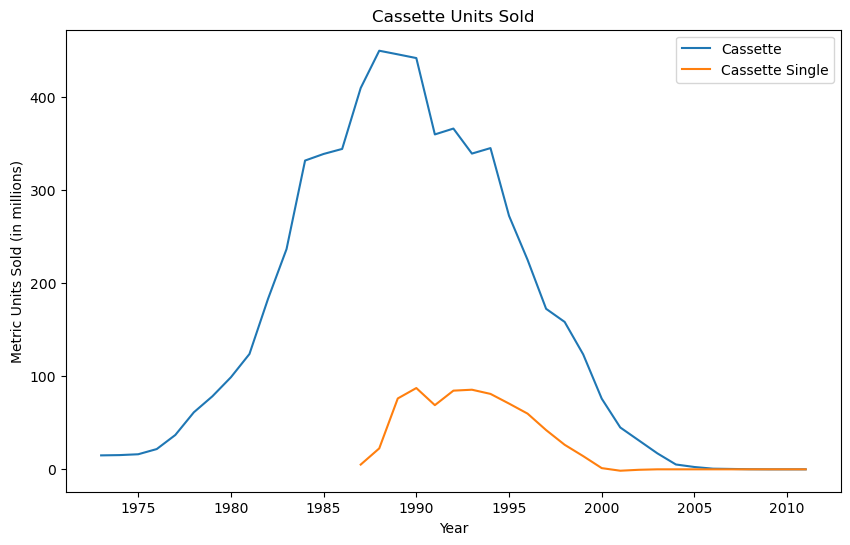

In [19]:
#plotting cassettes sold
plt.figure(figsize=(10, 6))
plt.plot(dfCassetteUnits['Year'], dfCassetteUnits['Actual Value (in millions)'], linestyle='-', label = 'Cassette')
plt.plot(dfCassetteSingleUnits['Year'], dfCassetteSingleUnits['Actual Value (in millions)'], linestyle='-', label = 'Cassette Single')
plt.title('Cassette Units Sold')
plt.xlabel('Year')
plt.ylabel('Metric Units Sold (in millions)')
plt.legend(loc= 'upper right')

plt.show()

In [20]:
df8 = df[df['Format']=='8 - Track']
df8Units = df8.loc[df['Metric'] == 'Units']

dfTapes = df[df['Format']=='Other Tapes']
dfTapesUnits = dfTapes.loc[df['Metric'] == 'Units']

dfDVDAudio = df[df['Format']=='DVD Audio']
dfDVDAudioUnits = dfDVDAudio.loc[df['Metric'] == 'Units']

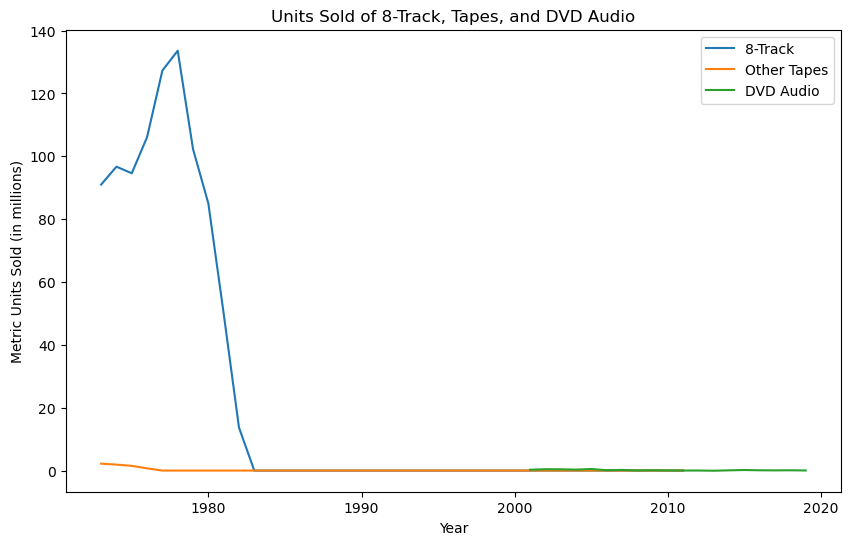

In [21]:

#plotting oudated physical format units sold

plt.figure(figsize=(10, 6))
plt.plot(df8Units['Year'], df8Units['Actual Value (in millions)'], linestyle='-', label = '8-Track')
plt.plot(dfTapesUnits['Year'], dfTapesUnits['Actual Value (in millions)'], linestyle='-', label = 'Other Tapes')
plt.plot(dfDVDAudioUnits['Year'], dfDVDAudioUnits['Actual Value (in millions)'], linestyle='-', label = 'DVD Audio')

plt.title('Units Sold of 8-Track, Tapes, and DVD Audio')
plt.xlabel('Year')
plt.ylabel('Metric Units Sold (in millions)')
plt.legend(loc = 'upper right')
plt.show()

In [22]:
#Base Code

#df = df[df['Format']=='']
#dfUnits = df.loc[df['Metric'] == 'Units']


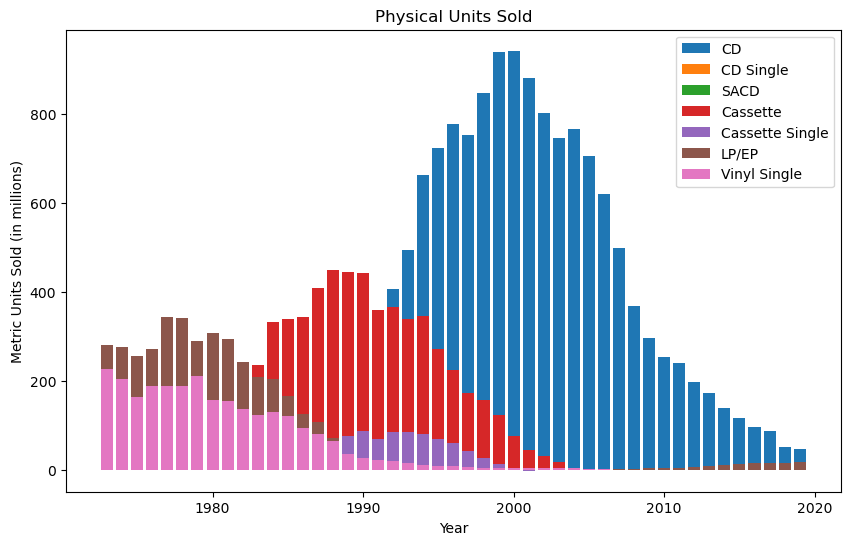

In [23]:
#plotting all physical formats
plt.figure(figsize=(10, 6))

plt.bar(dfCDUnits['Year'], dfCDUnits['Actual Value (in millions)'], linestyle='-',label = 'CD')
plt.bar(dfCDSingleUnits['Year'], dfCDSingleUnits['Actual Value (in millions)'], linestyle='-', label = 'CD Single')
plt.bar(dfSACDUnits['Year'], dfSACDUnits['Actual Value (in millions)'], linestyle='-', label = 'SACD')
plt.bar(dfCassetteUnits['Year'], dfCassetteUnits['Actual Value (in millions)'], linestyle='-', label = 'Cassette')
plt.bar(dfCassetteSingleUnits['Year'], dfCassetteSingleUnits['Actual Value (in millions)'], linestyle='-', label = 'Cassette Single')
plt.bar(dfVinylUnits['Year'], dfVinylUnits['Actual Value (in millions)'], linestyle='-',label = 'LP/EP')
plt.bar(dfVinylSingleUnits['Year'], dfVinylSingleUnits['Actual Value (in millions)'], linestyle='-', label = 'Vinyl Single')

plt.title('Physical Units Sold')
plt.xlabel('Year')
plt.ylabel('Metric Units Sold (in millions)')
plt.legend(loc='upper right')
plt.show()

In [24]:
dfDownloadSingle = df[df['Format']=='Download Single']
dfDSUnits = dfDownloadSingle.loc[df['Metric'] == 'Units']

dfDownloadAlbum = df[df['Format']=='Download Album']
dfDAUnits = dfDownloadAlbum.loc[df['Metric'] == 'Units']

dfDownloadMV = df[df['Format']=='Download Music Video']
dfDMVUnits = dfDownloadMV.loc[df['Metric'] == 'Units']

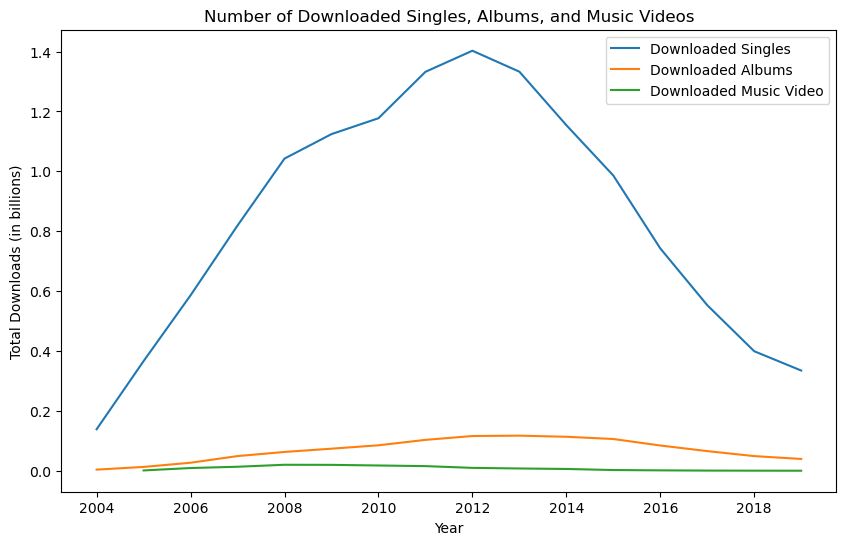

In [25]:
#plotting number of downloaded formats

plt.figure(figsize=(10, 6))

plt.plot(dfDSUnits['Year'], dfDSUnits['Actual Value (in millions)'].div(1000), linestyle='-', label = 'Downloaded Singles')
plt.plot(dfDAUnits['Year'], dfDAUnits['Actual Value (in millions)'].div(1000), linestyle='-', label = 'Downloaded Albums')
plt.plot(dfDMVUnits['Year'], dfDMVUnits['Actual Value (in millions)'].div(1000), linestyle='-', label = 'Downloaded Music Video')

plt.title('Number of Downloaded Singles, Albums, and Music Videos')
plt.xlabel('Year')
plt.ylabel('Total Downloads (in billions)')
plt.legend(loc = 'upper right')
plt.show()

In [26]:

dfPS = df[df['Format']=='Paid Subscriptions']
dfPSUnits = dfPS.loc[df['Metric'] == 'Units']
dfPaidSub = dfPSUnits.groupby('Year')['Actual Value (in millions)'].sum().reset_index()
dfPaidSub

,Year,Actual Value (in millions)
0,2005,2.60
1,2006,3.40
2,2007,3.60
3,2008,3.20
4,2009,2.40
...,...,...
10,2015,21.64
11,2016,45.38
12,2017,70.57
13,2018,97.11


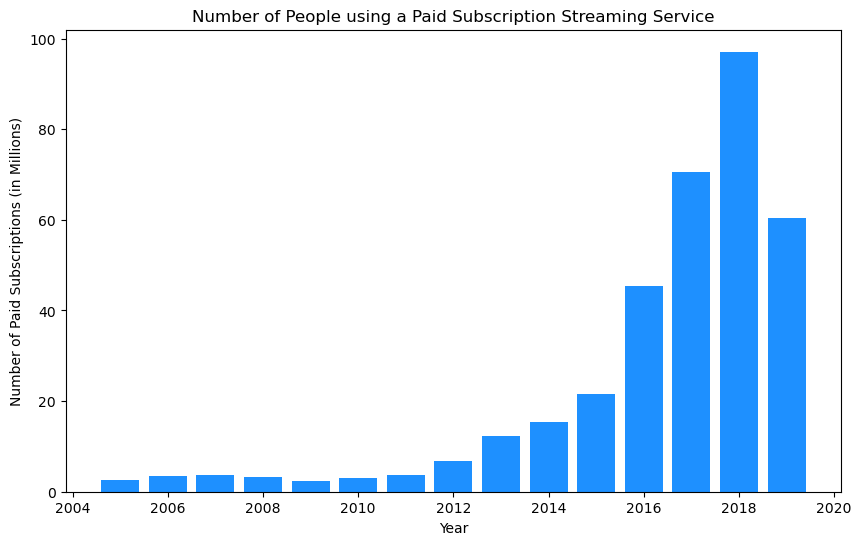

In [27]:
#plotting num of people using a paid subscription streaming service

plt.figure(figsize=(10, 6))

plt.bar(dfPaidSub['Year'], dfPaidSub['Actual Value (in millions)'], color = 'dodgerblue', linestyle='-', label = 'Paid Subscriptions')

plt.title('Number of People using a Paid Subscription Streaming Service')
plt.xlabel('Year')
plt.ylabel('Number of Paid Subscriptions (in Millions)')

plt.show()

In [28]:
#getting sum of units sold of all physical formats
dfs = [dfCDUnits, dfCDSingleUnits, dfCassetteUnits, dfCassetteSingleUnits, dfVinylUnits, dfVinylSingleUnits, dfTapesUnits, df8Units, dfDVDAudioUnits]
combined_df = pd.concat(dfs, ignore_index=True)

sumOfPF = combined_df.groupby('Year')['Actual Value (in millions)'].sum().reset_index()
sumOfPF

,Year,Actual Value (in millions)
0,1973,616.20
1,1974,593.90
2,1975,533.30
3,1976,591.60
4,1977,698.20
...,...,...
42,2015,131.90
43,2016,112.96
44,2017,103.83
45,2018,69.08


In [29]:
#getting sum of total downloaded media
dfDAUnits.reset_index(drop=True, inplace=True)
dfDSUnits.reset_index(drop=True, inplace=True)
dfDMVUnits.reset_index(drop=True, inplace=True)

sumDVal= dfDAUnits['Actual Value (in millions)'] + dfDSUnits['Actual Value (in millions)'] + dfDMVUnits['Actual Value (in millions)']
sumOfDownloads = pd.concat([dfDAUnits['Year'], sumDVal], axis=1)
sumOfDownloads.columns = ['Year', 'Total Downloaded (in millions)']
sumOfDownloads

,Year,Total Downloaded (in millions)
0,2004,145.90
1,2005,390.40
2,2006,628.20
3,2007,890.00
4,2008,1126.80
...,...,...
11,2015,1095.19
12,2016,829.52
13,2017,621.03
14,2018,450.43


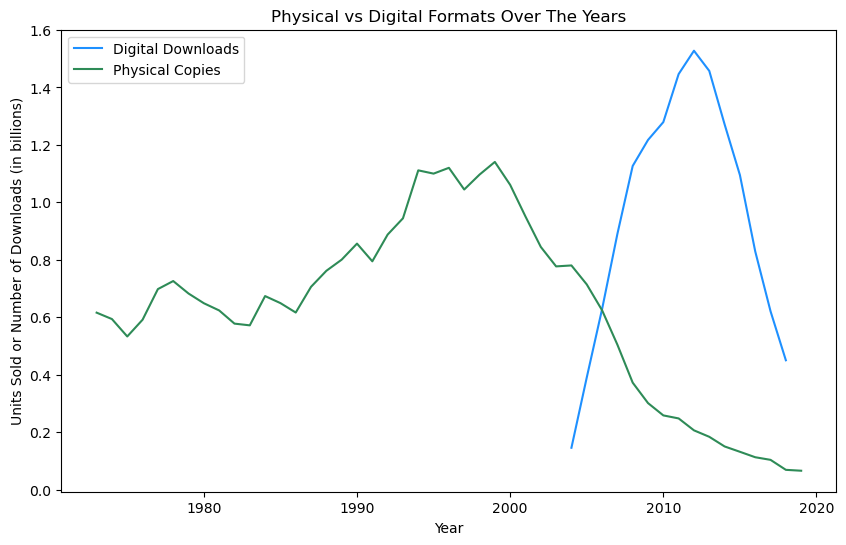

In [30]:
#plotting the units sold and number of downloads

plt.figure(figsize=(10, 6))

plt.plot(sumOfDownloads['Year'], sumOfDownloads['Total Downloaded (in millions)'].div(1000), color = 'dodgerblue', linestyle='-', label = 'Digital Downloads')
plt.plot(sumOfPF['Year'], sumOfPF['Actual Value (in millions)'].div(1000), color = 'seagreen', linestyle='-', label = 'Physical Copies')

plt.title('Physical vs Digital Formats Over The Years')
plt.xlabel('Year')
plt.ylabel('Units Sold or Number of Downloads (in billions)')
plt.legend(loc = 'upper left')
plt.show()

In [31]:
dfDownloadSingle = df[df['Format']=='Download Single']
dfDSRevenue = dfDownloadSingle.loc[df['Metric'] == 'Value']

dfDownloadAlbum = df[df['Format']=='Download Album']
dfDARevenue = dfDownloadAlbum.loc[df['Metric'] == 'Value']

dfDownloadMV = df[df['Format']=='Download Music Video']
dfDMVRevenue = dfDownloadMV.loc[df['Metric'] == 'Value']

dfDigital = [dfDSRevenue,dfDARevenue,dfDMVRevenue]
dfStreaming = pd.concat(dfDigital, ignore_index=True)

digitalRevenue= dfStreaming.groupby('Year')['Actual Value (in millions)'].sum().reset_index()
digitalRevenue

,Year,Actual Value (in millions)
0,2004,183.50
1,2005,502.70
2,2006,876.20
3,2007,1336.60
4,2008,1708.80
...,...,...
11,2015,2256.08
12,2016,1773.04
13,2017,1349.81
14,2018,992.30


In [32]:

dfLTPS = df[df['Format'] == 'Limited Tier Paid Subscription']
dfLTPS = dfLTPS.loc[df['Metric'] == 'Value']

dfODS = df[df['Format'] == 'On-Demand Streaming (Ad-Supported)']
dfODSU= dfODS.loc[df['Metric'] == 'Value']

dfOAS = df[df['Format'] == 'Other Ad-Supported']
dfOAS= dfOAS.loc[df['Metric'] == 'Value']

dfStream = [dfLTPS,dfODS,dfOAS]
dfStreaming = pd.concat(dfStream, ignore_index=True)

streamRevenue= dfStreaming.groupby('Year')['Actual Value (in millions)'].sum().reset_index()
streamRevenue


,Year,Actual Value (in millions)
0,2011,243.14
1,2012,361.28
2,2013,463.27
3,2014,590.27
4,2015,773.24
5,2016,1274.03
6,2017,1937.13
7,2018,2279.87
8,2019,2645.80


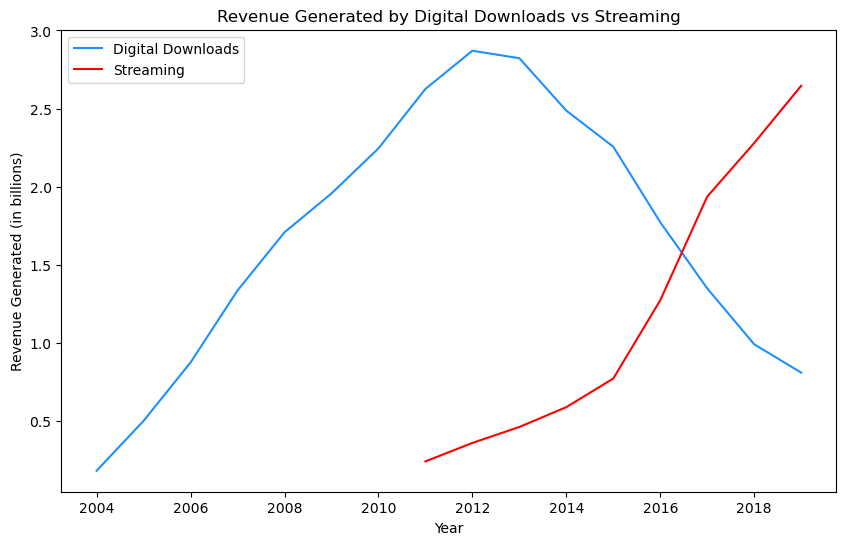

In [33]:
#plotting revenue of digital platforms 

plt.figure(figsize=(10, 6))
plt.plot(digitalRevenue['Year'], digitalRevenue['Actual Value (in millions)'].div(1000), color = 'dodgerblue', linestyle='-', label = 'Digital Downloads')
plt.plot(streamRevenue['Year'], streamRevenue['Actual Value (in millions)'].div(1000), color = 'red', linestyle='-', label = 'Streaming')


plt.title('Revenue Generated by Digital Downloads vs Streaming')
plt.xlabel('Year')
plt.ylabel('Revenue Generated (in billions)')
plt.legend(loc = 'upper left')

plt.show()

In [34]:
dfCasRev = dfCassette[df['Metric'] == 'Value']
dfCasSRev = dfCassetteSingle[df['Metric'] == 'Value']
dfVRev = dfVinyl[df['Metric'] == 'Value']
dfVSRev =dfVinylSingle[df['Metric'] == 'Value']

dfCD = df[df['Format']==('CD')]
dfCDRev = dfCD[df['Metric'] == 'Value']
dfCDSRev = dfCDSingle[df['Metric'] == 'Value']
dfSACDRev = dfSACD[df['Metric'] == 'Value']


df8 = df[df['Format']=='8 - Track']
df8Units = df8.loc[df['Metric'] == 'Units']

dfTapes = df[df['Format']=='Other Tapes']
dfTapesUnits = dfTapes.loc[df['Metric'] == 'Units']

dfDVDAudio = df[df['Format']=='DVD Audio']
dfDVDAudioUnits = dfDVDAudio.loc[df['Metric'] == 'Units']
dfCDRev

/var/folders/y9/vn7kmchn2yd664b7lrjq7tdm0000gn/T/ipykernel_80848/3972520954.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfCasRev = dfCassette[df['Metric'] == 'Value']
/var/folders/y9/vn7kmchn2yd664b7lrjq7tdm0000gn/T/ipykernel_80848/3972520954.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfCasSRev = dfCassetteSingle[df['Metric'] == 'Value']
/var/folders/y9/vn7kmchn2yd664b7lrjq7tdm0000gn/T/ipykernel_80848/3972520954.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfVRev = dfVinyl[df['Metric'] == 'Value']
/var/folders/y9/vn7kmchn2yd664b7lrjq7tdm0000gn/T/ipykernel_80848/3972520954.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfVSRev =dfVinylSingle[df['Metric'] == 'Value']
/var/folders/y9/vn7kmchn2yd664b7lrjq7tdm0000gn/T/ipykernel_80848/3972520954.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfCDRev =

,Format,Metric,Year,Actual Value (in millions)
index,,,,
856,CD,Value,1983,17.20
857,CD,Value,1984,103.30
858,CD,Value,1985,389.50
859,CD,Value,1986,930.10
860,CD,Value,1987,1593.60
...,...,...,...,...
888,CD,Value,2015,1444.99
889,CD,Value,2016,1130.76
890,CD,Value,2017,1057.32


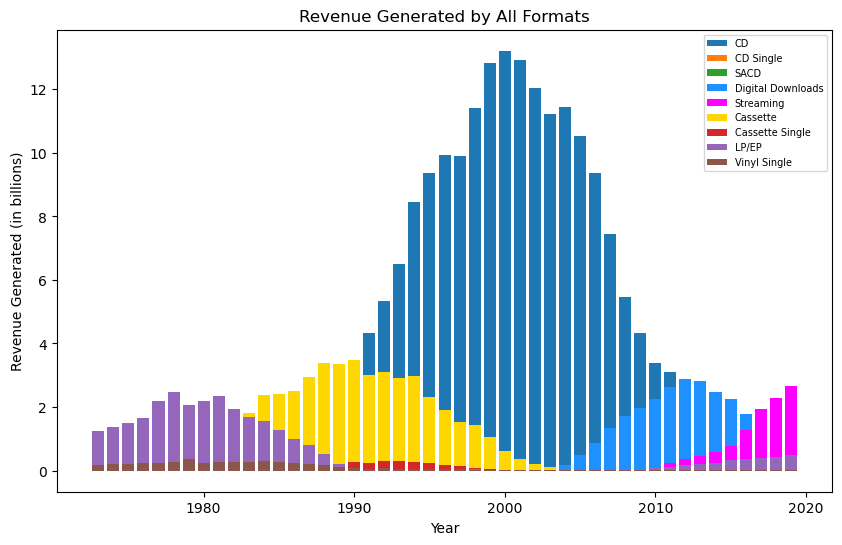

In [35]:
#plotting revenue from every music format

plt.figure(figsize=(10, 6))
plt.bar(dfCDRev['Year'], dfCDRev['Actual Value (in millions)'].div(1000), linestyle='-',label = 'CD')
plt.bar(dfCDSRev['Year'], dfCDSRev['Actual Value (in millions)'].div(1000), linestyle='-', label = 'CD Single')
plt.bar(dfSACDRev['Year'], dfSACDRev['Actual Value (in millions)'].div(1000), linestyle='-', label = 'SACD')

plt.bar(digitalRevenue['Year'], digitalRevenue['Actual Value (in millions)'].div(1000), color = 'dodgerblue', linestyle='-', label = 'Digital Downloads')
plt.bar(streamRevenue['Year'], streamRevenue['Actual Value (in millions)'].div(1000), color = 'magenta', linestyle='-', label = 'Streaming')



plt.bar(dfCasRev['Year'], dfCasRev['Actual Value (in millions)'].div(1000),color = 'gold', linestyle='-', label = 'Cassette')
plt.bar(dfCasSRev['Year'], dfCasSRev['Actual Value (in millions)'].div(1000), linestyle='-', label = 'Cassette Single')
plt.bar(dfVRev['Year'], dfVRev['Actual Value (in millions)'].div(1000), linestyle='-',label = 'LP/EP')
plt.bar(dfVSRev['Year'], dfVSRev['Actual Value (in millions)'].div(1000), linestyle='-', label = 'Vinyl Single')


plt.title('Revenue Generated by All Formats')
plt.xlabel('Year')
plt.ylabel('Revenue Generated (in billions)')
plt.legend(fontsize = '7')

plt.show()